/tmp/ipython-input-11-1840319345.py:22: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




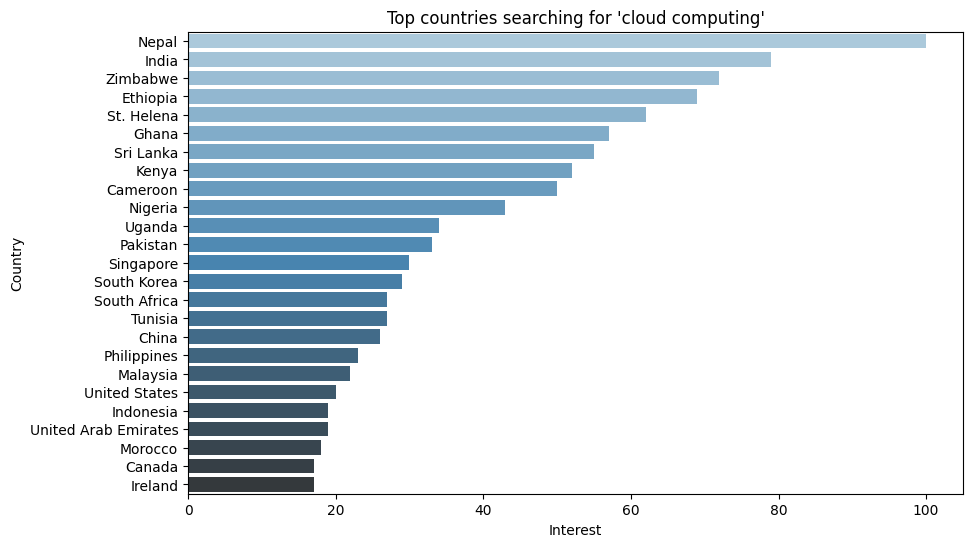

/usr/local/lib/python3.11/dist-packages/pytrends/request.py:260: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



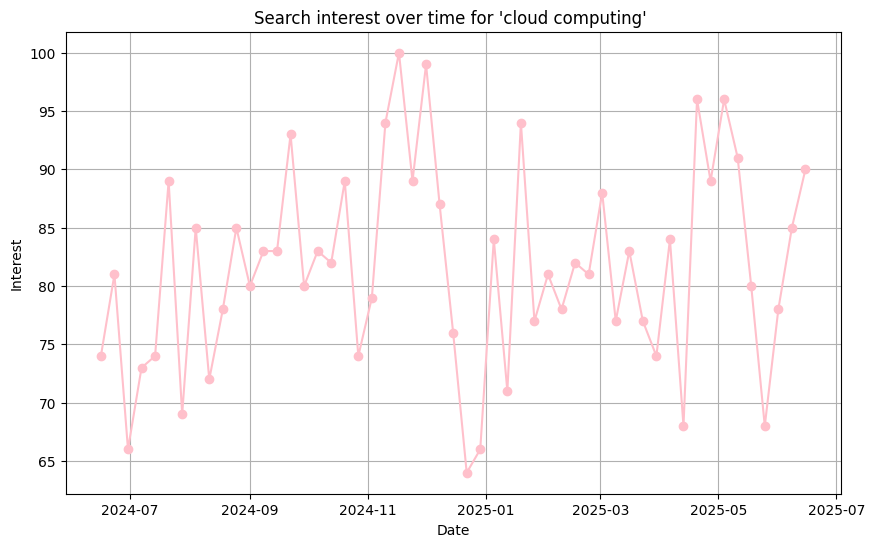

/usr/local/lib/python3.11/dist-packages/pytrends/request.py:260: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



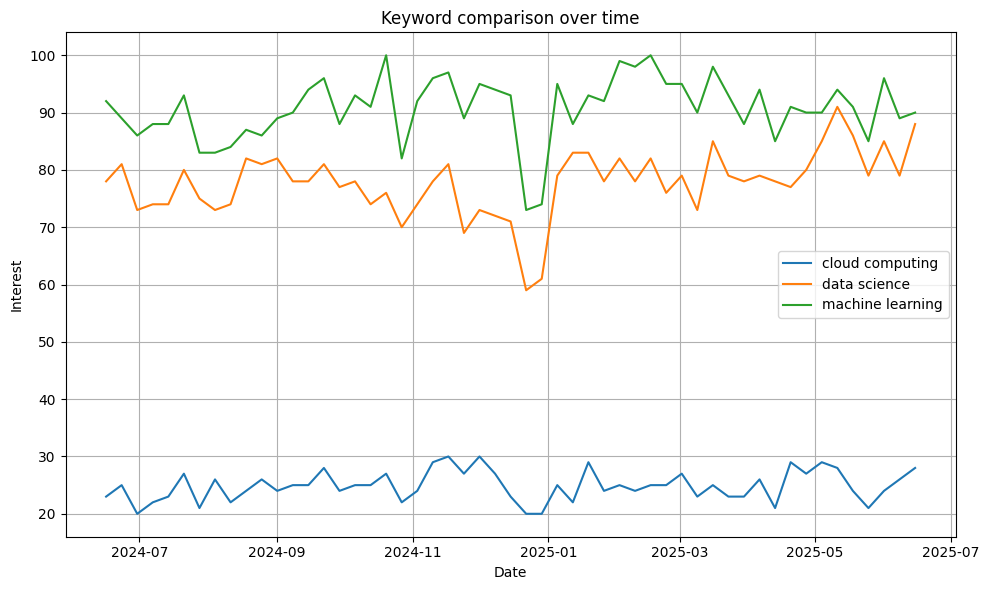

In [ ]:
# Google Search Analysis
# Installing library
!pip install pytrends
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pytrends.request import TrendReq

# Setup pytrends library and keyword
pytrends = TrendReq(hl='en-US', tz=360)
keyword = "cloud computing"

# Build the payload
pytrends.build_payload([keyword], cat=0, timeframe='today 12-m', geo='', gprop='')

# Country wise interest
region_data = pytrends.interest_by_region()
region_data = region_data.sort_values(by=keyword, ascending=False).head(25)
plt.figure(figsize=(10,6))
sns.barplot(x=region_data[keyword], y=region_data.index, palette = "Blues_d")
plt.title(f"Top countries searching for '{keyword}'")
plt.xlabel("Interest")
plt.ylabel("Country")
plt.show()

# World map
region_data = region_data.reset_index()
fig = px.choropleth(region_data, locations='geoName', locationmode='country names', color=keyword, title=f"Search interest for '{keyword}' by country", color_continuous_scale='Blues')
fig.show()

# Time waste interest
time_df = pytrends.interest_over_time()
plt.figure(figsize=(10,6))
plt.plot(time_df.index, time_df[keyword], marker='o', color='pink')
plt.title(f"Search interest over time for '{keyword}' ")
plt.xlabel("Date")
plt.ylabel("Interest")
plt.grid(True)
plt.show()

# Multiple keywords compare
kw_list = ["cloud computing", "data science", "machine learning"]
pytrends.build_payload(kw_list, cat=0, timeframe='today 12-m',geo='', gprop='')
compare_df = pytrends.interest_over_time()
plt.figure(figsize=(10,6))
for kw in kw_list:
    plt.plot(compare_df.index, compare_df[kw], label=kw)

plt.title("Keyword comparison over time")
plt.xlabel("Date")
plt.ylabel("Interest")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()